# The Transformer architecture was introduced in June 2017. The focus of the original research was on translation tasks. This was followed by the introduction of several influential models, including:

* June 2018: GPT, the first pretrained Transformer model, used for fine-tuning on various NLP tasks and obtained state-of-the-art results

* October 2018: BERT, another large pretrained model, this one designed to produce better summaries of sentences (more on this in the next chapter!)
 
* February 2019: GPT-2, an improved (and bigger) version of GPT that was not immediately publicly released due to ethical concerns

* October 2019: DistilBERT, a distilled version of BERT that is 60% faster, 40% lighter in memory, and still retains 97% of BERT’s performance

* October 2019: BART and T5, two large pretrained models using the same architecture as the original Transformer model (the first to do so)

* May 2020, GPT-3, an even bigger version of GPT-2 that is able to perform well on a variety of tasks without the need for fine-tuning (called zero-shot learning)

* This list is far from comprehensive, and is just meant to highlight a few of the different kinds of Transformer models. Broadly, they can be grouped into three categories:

1. GPT-like (also called auto-regressive Transformer models)
1. BERT-like (also called auto-encoding Transformer models)
1. BART/T5-like (also called sequence-to-sequence Transformer models)

# Transformers are language models

* All the Transformer models mentioned above (GPT, BERT, BART, T5, etc.) have been trained as language models. This means they have been trained on large amounts of raw text in a self-supervised fashion. Self-supervised learning is a type of training in which the objective is automatically computed from the inputs of the model. That means that humans are not needed to label the data!
* This type of model develops a statistical understanding of the language it has been trained on, but it’s not very useful for specific practical tasks. Because of this, the general pretrained model then goes through a process called transfer learning. During this process, the model is fine-tuned in a supervised way — that is, using human-annotated labels — on a given task.
* An example of a task is predicting the next word in a sentence having read the n previous words. This is called causal language modeling because the output depends on the past and present inputs, but not the future ones.

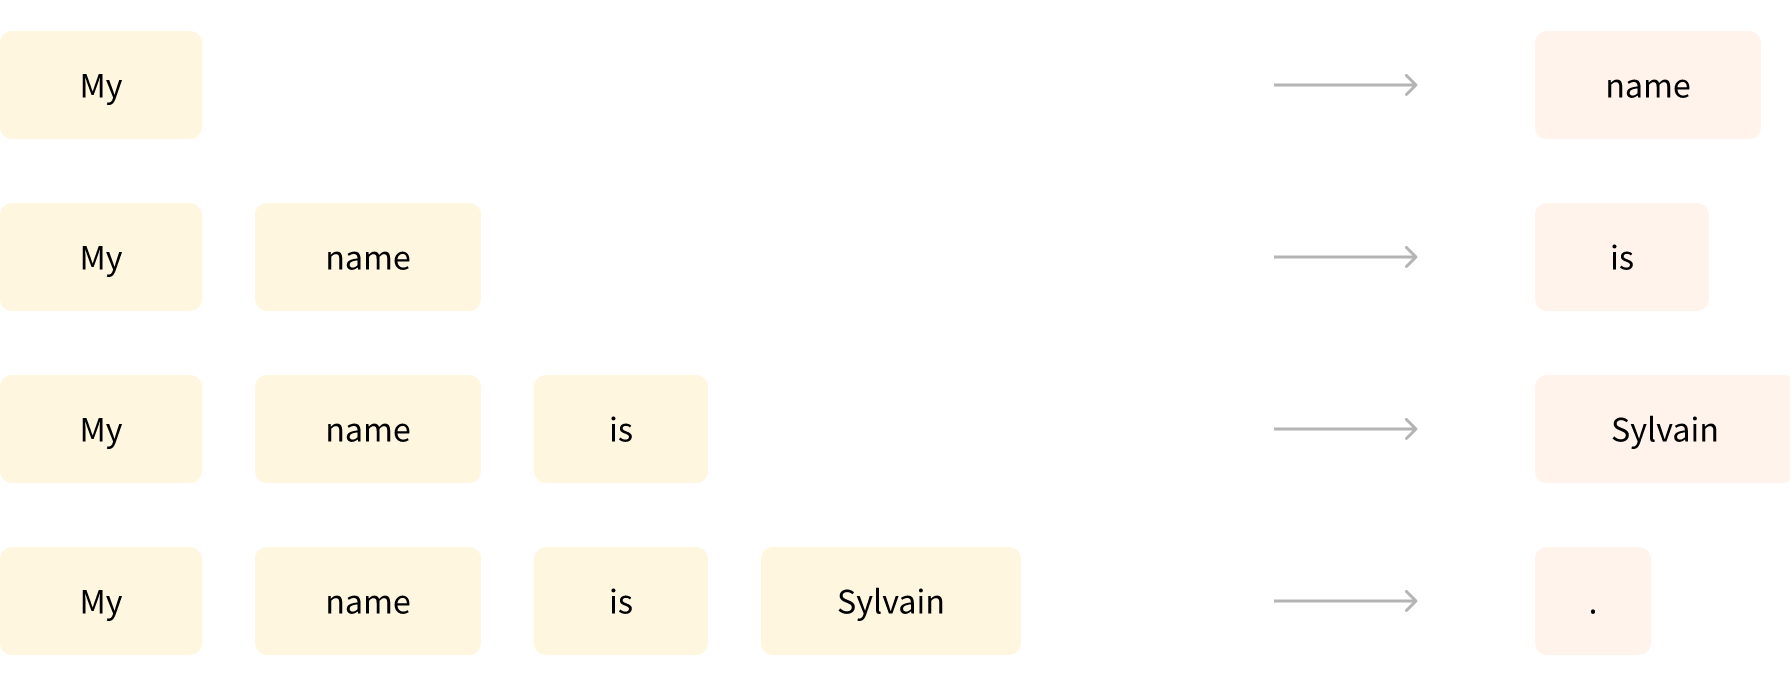!

# Another example is masked language modeling, in which the model predicts a masked word in the sentence.

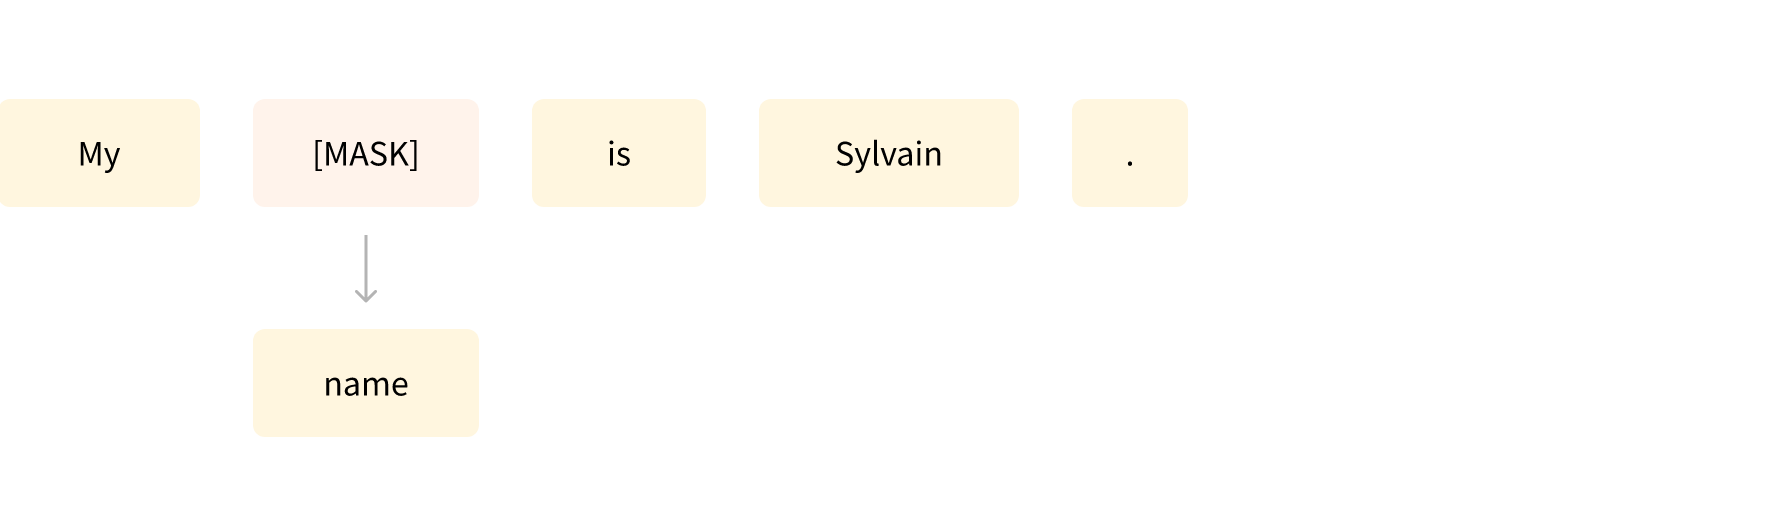

# Transformers are big models
* Apart from a few outliers (like DistilBERT), the general strategy to achieve better performance is by increasing the models’ sizes as well as the amount of data they are pretrained on.
* Unfortunately, training a model, especially a large one, requires a large amount of data. This becomes very costly in terms of time and compute resources. It even translates to environmental impact, as can be seen in the following graph.

#  environmental impact of pretraining. 
* Imagine if each time a research team, a student organization, or a company wanted to train a model, it did so from scratch. This would lead to huge, unnecessary global costs!
* This is why sharing language models is paramount: sharing the trained weights and building on top of already trained weights reduces the overall compute cost and carbon footprint of the community.
* By the way, you can evaluate the carbon footprint of your models’ training through several tools. For example ML CO2 Impact or Code Carbon which is integrated in 🤗 Transformers.

# Pretraining
* Pretraining is the act of training a model from scratch: the weights are randomly initialized, and the training starts without any prior knowledge.
* This pretraining is usually done on very large amounts of data. Therefore, it requires a very large corpus of data, and training can take up to several weeks.

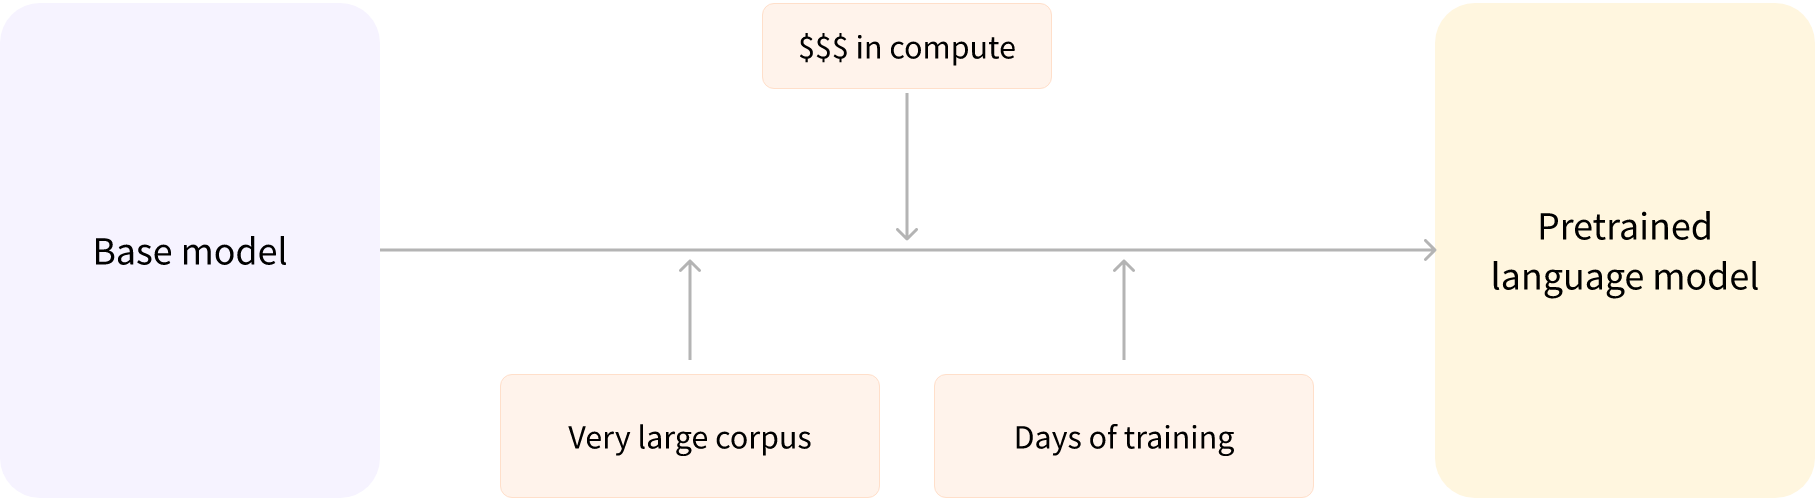

# Fine-tuning
* Fine-tuning, on the other hand, is the training done after a model has been pretrained. To perform fine-tuning, you first acquire a pretrained language model, then perform additional training with a dataset specific to your task. 

# Why not simply train directly for the final task? There are a couple of reasons:

* The pretrained model was already trained on a dataset that has some similarities with the fine-tuning dataset. The fine-tuning process is thus able to take advantage of knowledge acquired by the initial model during pretraining (for instance, with NLP problems, the pretrained model will have some kind of statistical understanding of the language you are using for your task).
* Since the pretrained model was already trained on lots of data, the fine-tuning requires way less data to get decent results.
* For the same reason, the amount of time and resources needed to get good results are much lower.

# Transfer learning.
* For example, one could leverage a pretrained model trained on the English language and then fine-tune it on an arXiv corpus, resulting in a science/research-based model. The fine-tuning will only require a limited amount of data: the knowledge the pretrained model has acquired is “transferred,” hence the term **Transfer learning**

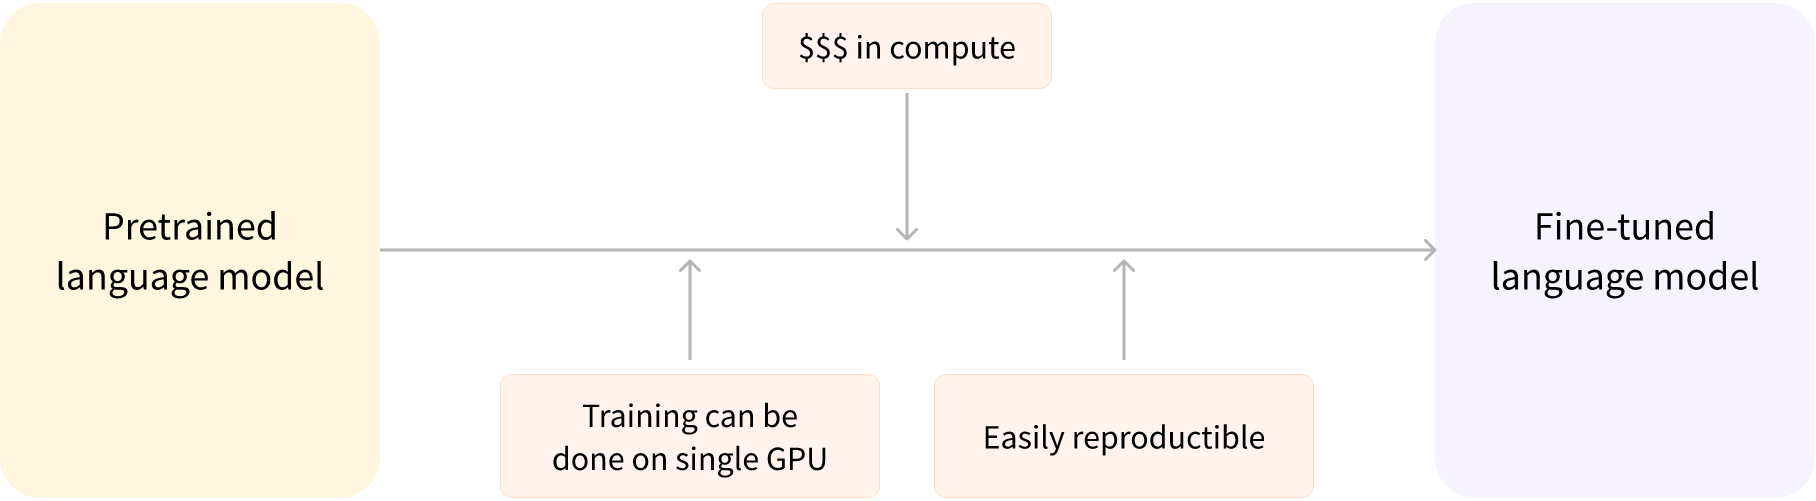

* Fine-tuning a model therefore has lower time, data, financial, and environmental costs. It is also quicker and easier to iterate over different fine-tuning schemes, as the training is less constraining than a full pretraining.

* This process will also achieve better results than training from scratch (unless you have lots of data), which is why you should always try to leverage a pretrained model — one as close as possible to the task you have at hand — and fine-tune it.

# General architecture

****The model is primarily composed of two blocks:****

* **Encoder (left): The encoder receives an input and builds a representation of it (its features). This means that the model is optimized to acquire understanding from the input.****
* **Decoder (right): The decoder uses the encoder’s representation (features) along with other inputs to generate a target sequence. This means that the model is optimized for generating outputs.**

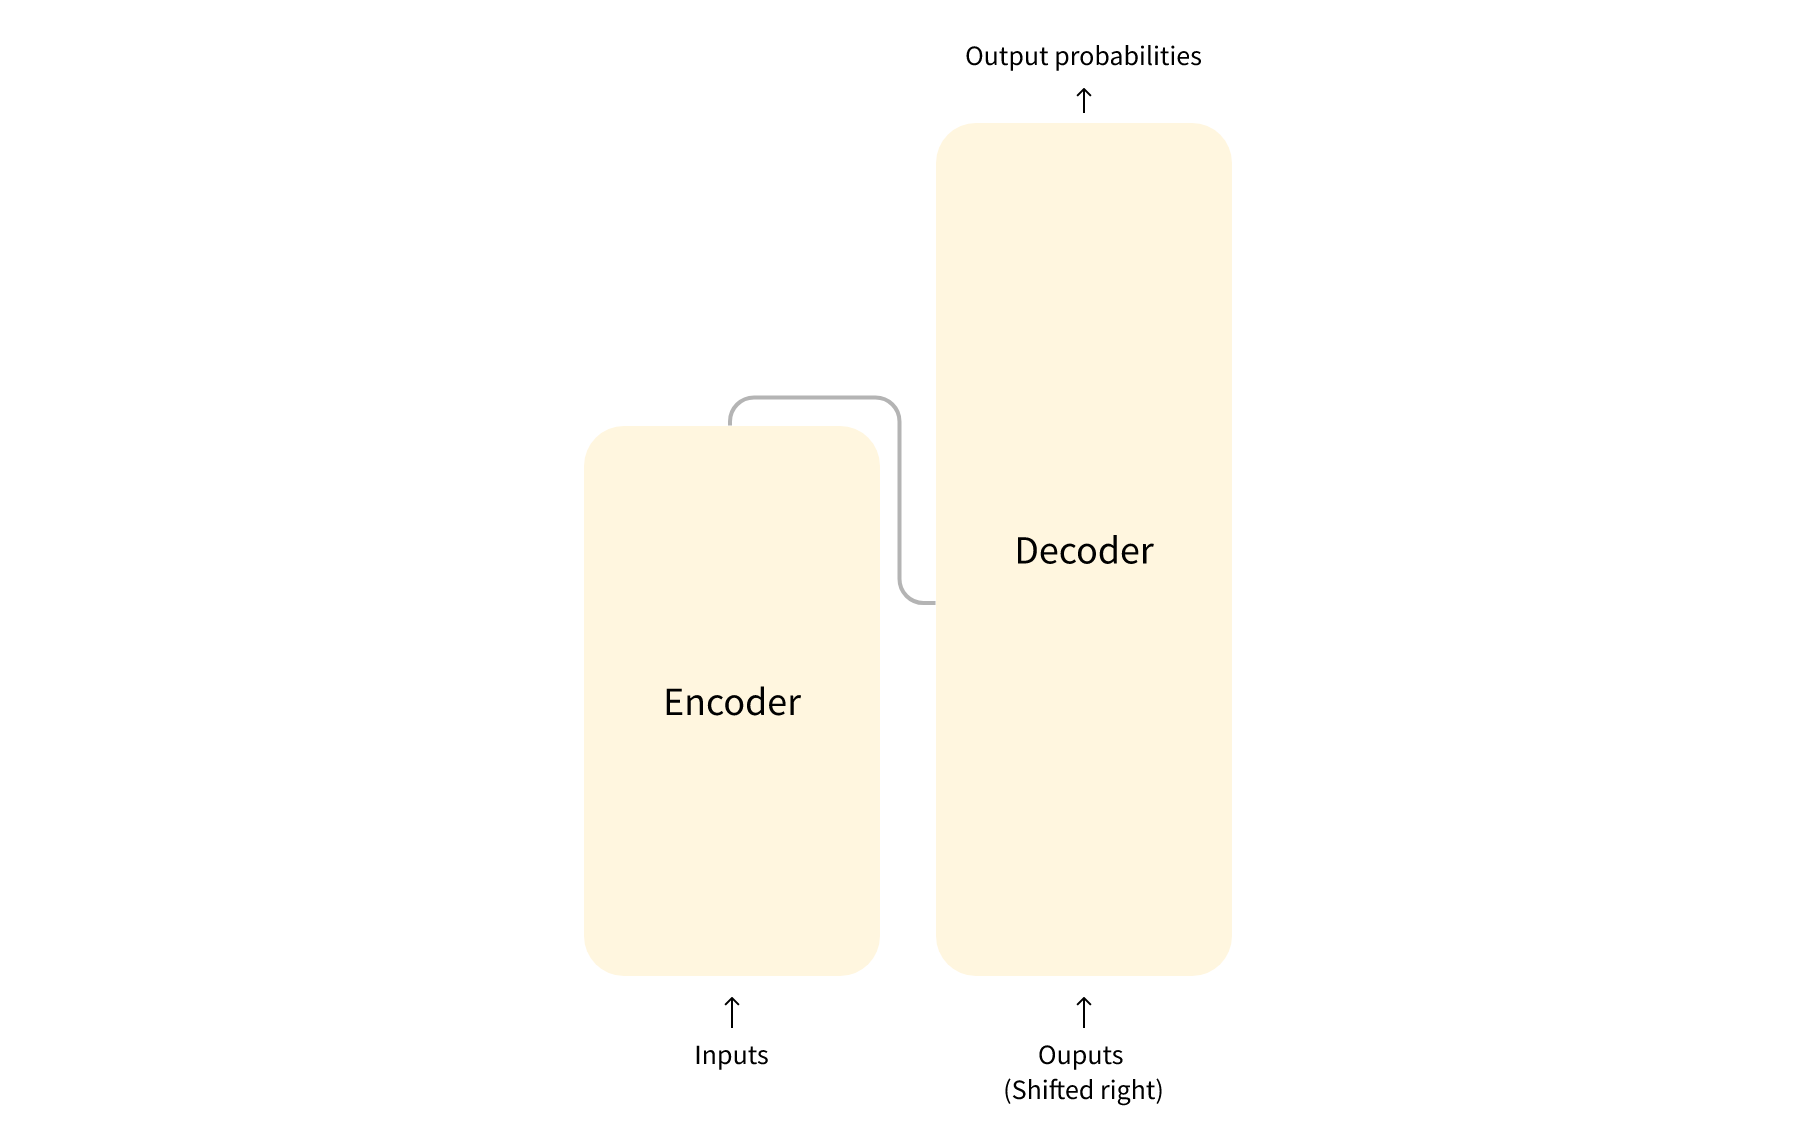

# Each of these parts can be used independently, depending on the task:

1. **Encoder-only models: Good for tasks that require understanding of the input, such as sentence classification and named entity recognition.**
1. **Decoder-only models: Good for generative tasks such as text generation.**
1. **Encoder-decoder models or sequence-to-sequence models: Good for generative tasks that require an input, such as translation or summarization.**

# Attention layers

* **A key feature of Transformer models is that they are built with special layers called attention layers**

* **In fact, the title of the paper introducing the Transformer architecture was **“Attention Is All You Need”!** .**This layer will tell the model to pay specific attention to certain words in the sentence you passed it (and more or less ignore the others) when dealing with the representation of each word.**

* **To put this into context, consider the task of translating text from English to French. Given the input “You like this course”, a translation model will need to also attend to the adjacent word “You” to get the proper translation for the word “like”, because in French the verb “like” is conjugated differently depending on the subject. The rest of the sentence, however, is not useful for the translation of that word. In the same vein, when translating “this” the model will also need to pay attention to the word “course”, because “this” translates differently depending on whether the associated noun is masculine or feminine. Again, the other words in the sentence will not matter for the translation of “this”. With more complex sentences (and more complex grammar rules), the model would need to pay special attention to words that might appear farther away in the sentence to properly translate each word.**

* **The same concept applies to any task associated with natural language: a word by itself has a meaning, but that meaning is deeply affected by the context, which can be any other word (or words) before or after the word being studied.**

# The original architecture

* **The Transformer architecture was originally designed for translation. During training, the encoder receives inputs (sentences) in a certain language, while the decoder receives the same sentences in the desired target language.**

* **In the encoder, the attention layers can use all the words in a sentence (since, as we just saw, the translation of a given word can be dependent on what is after as well as before it in the sentence).**

* **The decoder, however, works sequentially and can only pay attention to the words in the sentence that it has already translated (so, only the words before the word currently being generated). For example, when we have predicted the first three words of the translated target, we give them to the decoder which then uses all the inputs of the encoder to try to predict the fourth word.**

* **To speed things up during training (when the model has access to target sentences), the decoder is fed the whole target, but it is not allowed to use future words (if it had access to the word at position 2 when trying to predict the word at position 2, the problem would not be very hard!). For instance, when trying to predict the fourth word, the attention layer will only have access to the words in positions 1 to 3.**

* **The original Transformer architecture looked like this, with the encoder on the left and the decoder on the right.**



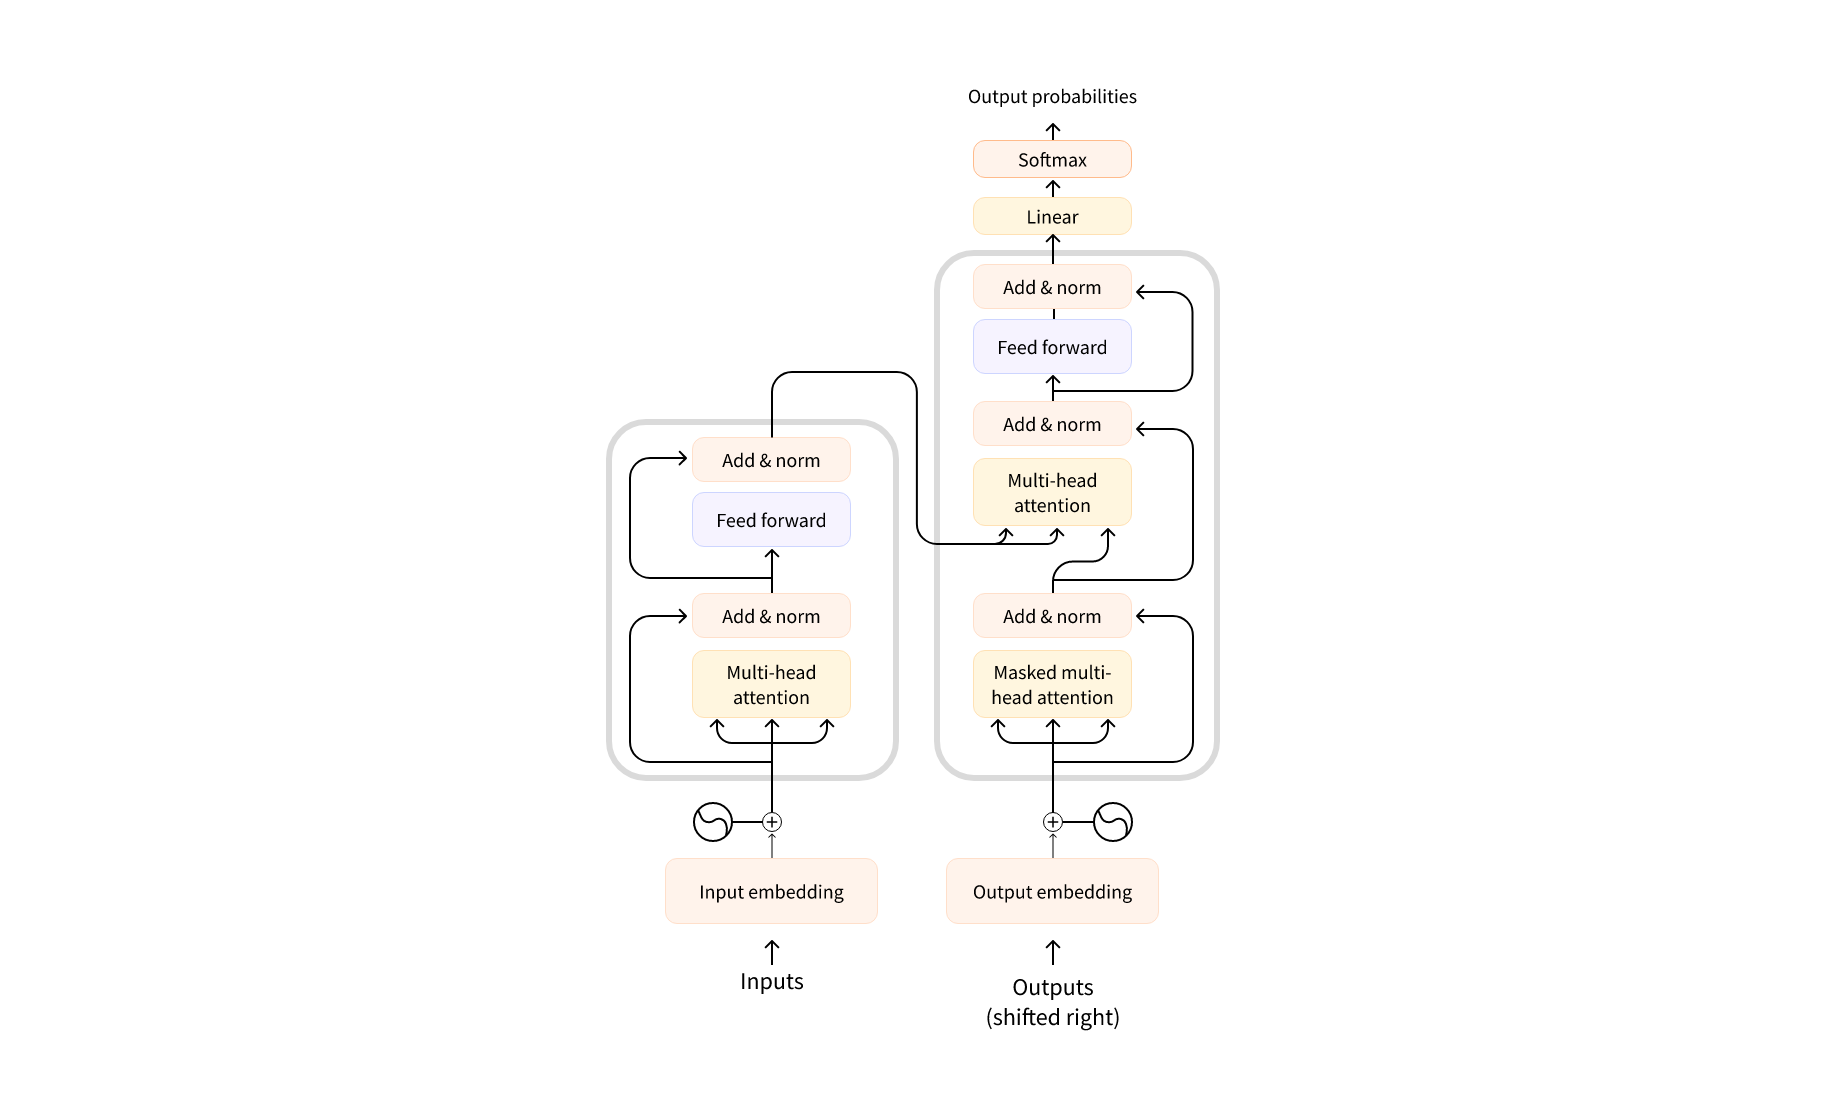

# Architectures vs. checkpoints

**Architecture:** This is the skeleton of the model — the definition of each layer and each operation that happens within the model.

**Checkpoints:** These are the weights that will be loaded in a given architecture.

**Model:** This is an umbrella term that isn’t as precise as “architecture” or “checkpoint”: it can mean both. This course will specify architecture or checkpoint when it matters to reduce ambiguity.

For example, BERT is an architecture while bert-base-cased, a set of weights trained by the Google team for the first release of BERT, is a checkpoint. However, one can say “the BERT model” and “the bert-base-cased model.”